Study material: Do it! Deepleaning 입문

Chapter 2.
Goal: Run simple functions in numpy, matplotlib in colab environment

1D(1x3), 2D(2x3) list

In [ ]:
my_list = [10, 'hello lost', 20]
print(my_list[1])

hello lost


In [ ]:
my_list_2 = [[10,20,30],[40,50,60]]

In [ ]:
print(my_list_2[1][1])

50


numpy import & check ver.

In [ ]:
import numpy as np
print(np.__version__)

1.19.5


2D array using array()

In [ ]:
my_arr = np.array([[10,20,30],[40,50,60]])
print(my_arr)

[[10 20 30]
 [40 50 60]]


check np array using type(): 
the last line of the code cell prints the result without print()

In [ ]:
type(my_arr)

numpy.ndarray

element in numpy array

In [ ]:
my_arr[0][2]

30

numpy built-in function (faster than 'for statement')

In [ ]:
np.sum(my_arr)

210

draw graph using matplotlib

In [ ]:
import matplotlib.pyplot as plt

draw line plot

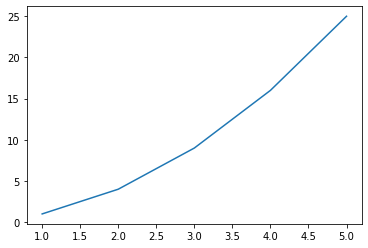

In [ ]:
plt.plot([1,2,3,4,5],[1,4,9,16,25])
plt.show()

draw scatter plot

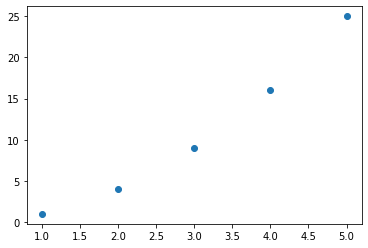

In [ ]:
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()

draw scatter plot with numpy array

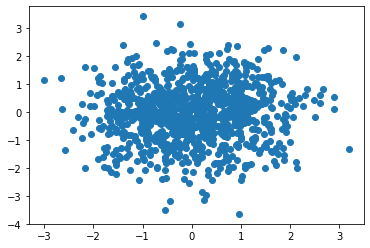

In [ ]:
x = np.random.randn(1000) # 표준 정규 분포를 따르는 난수 1000개 생성
y = np.random.randn(1000) # 표준 정규 분포를 따르는 난수 1000개 생성
plt.scatter(x, y)
plt.show()

Chapter 3. Goal: Run linear regression, GD (Gradient descent), loss function

Goal of linear regression: To find slope a and intercept b

y=ax+b

example: diabetes datasets from sklearn

type of the data diabetes: Bunch class (like python dictionary)

input: data(442x10), output: target(442x1)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.data[0:3] # 3data * 10features

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
diabetes.target[:3] # targets of 3 data

array([151.,  75., 141.])

visualization using matplotlib of the data of diabetes

(with 2 features to draw in 2D space)

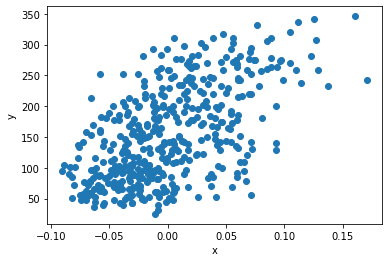

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target) # x: first, second features of all patients. y: targets of all patients.
plt.xlabel('x')
plt.ylabel('y')
plt.show()

preparation of the training data

In [ ]:
x = diabetes.data[:,2]
y = diabetes.target

example: find w, b

1) set random w, b

2) calculate y hat from random sample from x

3) compare y hat and y

4) update w, b

5) repeat 2-4 using all samples

In [ ]:
w = 1.0
b = 1.0

In [ ]:
y_hat = x[0]*w + b
print(y_hat) # target y: 151

1.0616962065186886


In [ ]:
print(y[0])

151.0


In [ ]:
# update y_hat by changing w value
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [ ]:
# update w (dy_hat / dw)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)
# w_rate: w rate about x[0]

0.061696206518688734


update w using w_rate

In [ ]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


update b using b_rate

In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [ ]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [ ]:
b_new = b + 1
print(b_new)

2.0


disadvantages of above method:

1) if y_hat is too small than y, hard to update w and b value with large scale

2) if y_hat is bigger than y, cannot decrease y_hat

==> Backpropagation is the solution!

[Backpropagation]
by multiplying w_rate by (y hat - y),

1) can update w,b effectively when y_hat is too small than y

2) can update the direction of w, b when y_hat value oversteps y

In [ ]:
# update w with err * rate
# x[0]
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [ ]:
# w_rate = x[1]
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [ ]:
# repeat using all sample
for x_i, y_i in zip(x,y): # zip(): gets each element from multi array
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w,b)

587.8654539985689 99.40935564531424


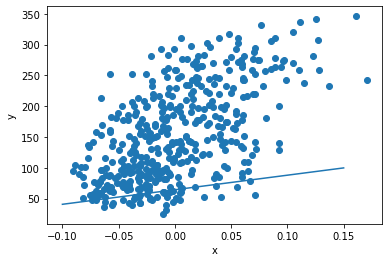

In [ ]:
# draw the model(w,b) to check it fits well on dataset
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * 2 + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# repeat 100 epochs
for i in range(1,100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


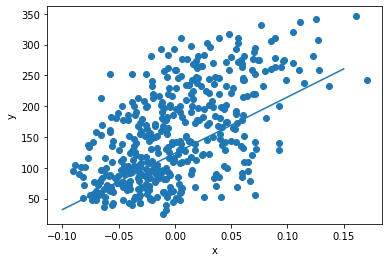

In [ ]:
# draw updated model
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# y_hat = 913.6x + 123.4

In [ ]:
# predictation with the model
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


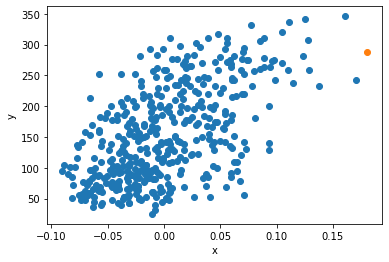

In [ ]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The correlation between loss function and gradient descent